In [24]:
%matplotlib inline

In [3]:
import re
import csv
import random
import nltk
import numpy as np
import matplotlib.pyplot as plt
from pyemd import emd
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split

In [2]:
nltk.download('stopwords')
stpwds = set(nltk.corpus.stopwords.words("english"))
my_p = re.compile(r"(\b[-']\b)|[\W_]")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zapfack/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
with open("word_vectors_lab5.csv", "r") as file:
    reader = csv.reader(file)
    word_vectors  = list(reader)

# the first entry of each sublist is the word
# the 300 following entries are the coordinates of the word in the embedding space



In [1]:
# separate the words from their coordinates
words = []
# coordinates is a list of list representation of observations/dimensions data frame
coordinates = []

for vector in word_vectors:
    words.append(vector[0])
    coordinates.append(vector[1:301])

coordinates = np.array(coordinates).astype(np.float)

NameError: name 'word_vectors' is not defined

In [12]:
# function that returns the word vector as numpy array
def my_vector_getter(word, my_coordinates):
    index = words.index(word)
    word_array = my_coordinates[index].ravel()
    return (word_array)

# function that returns cosine similarity between two word vectors
def my_cos_similarity(word1, word2, my_coordinates):
    sim = cosine(my_vector_getter(word1, my_coordinates),my_vector_getter(word2, my_coordinates)) 
    return (round(sim, 4))

# two similar words
print my_cos_similarity("man","woman", coordinates)

# two dissimilar words
my_cos_similarity("man","however", coordinates)

0.7664


/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

0.0166

In [ ]:
# for visualization, project the words into a lower-dimensional space using PCA
# store the results in an array called new_coordinates
for w in 

In [52]:
from sklearn.decomposition import PCA
n_components = 50
new_coordinates = PCA(n_components=n_components).fit_transform(coordinates)
new_coordinates.shape

(24559, 50)

In [18]:
# examples of concepts captured in the embedding space:

# country-capital
France = my_vector_getter("France", new_coordinates)
Paris = my_vector_getter("Paris", new_coordinates)
Germany = my_vector_getter("Germany", new_coordinates)
Berlin = my_vector_getter("Berlin", new_coordinates)

print France - Paris

[ 0.07777949 -0.03798939 -0.14496721 -0.18266206  0.143086   -0.19418894
 -0.04558427  0.03816723  0.0323095  -0.00976232  0.0491444   0.33820108
  0.1477809  -0.08308351  0.00178464  0.13460487 -0.00259821 -0.13321601
  0.16727636 -0.02356712  0.10344071  0.23724216 -0.12369129 -0.23831906
 -0.19759151 -0.18485921 -0.01556244 -0.08036753 -0.07865629 -0.05171252
  0.03954204 -0.22262654  0.09513994  0.00653358  0.24672348  0.1796631
 -0.14078385 -0.02156477 -0.18291886 -0.02213205 -0.00516208  0.03546838
  0.16078242 -0.03144438  0.04833308  0.22255285 -0.10461826  0.03949514
 -0.11183839 -0.2095047 ]


In [22]:
operation = France - Paris + Berlin
round(cosine(operation, Germany),5)

/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.93032

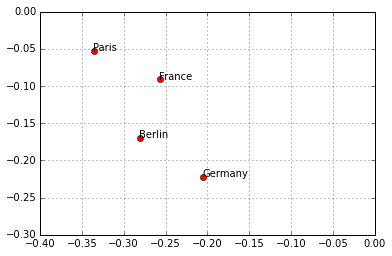

In [25]:
# visual inspection
dim_1_coords = [element[0] for element in [France, Paris, Germany, Berlin]]
dim_2_coords = [element[1] for element in [France, Paris, Germany, Berlin]]

names = ["France", "Paris", "Germany", "Berlin"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(dim_1_coords, dim_2_coords, "ro")
plt.axis([-0.4, 0, -0.3, 0])

for x, y, name in zip(dim_1_coords , dim_2_coords, names):                                                
    ax.annotate(name, xy=(x, y))

plt.grid()

In [54]:
# adjective-superlative
biggest = my_vector_getter("biggest", new_coordinates)
big = my_vector_getter("big", new_coordinates)
small = my_vector_getter("small", new_coordinates)
smallest = my_vector_getter("smallest", new_coordinates)

operation = biggest - big + small
round(cosine(operation, smallest),5)

/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.54758

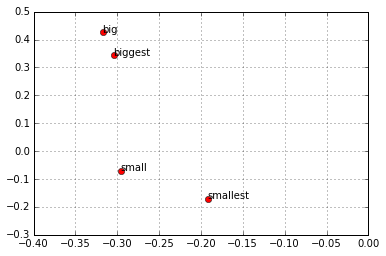

In [56]:
# visual inspection
# repeat the same steps as for the country-capital task
# visual inspection
dim_1_coords = [element[0] for element in [biggest, big, small, smallest]]
dim_2_coords = [element[1] for element in [biggest, big, small, smallest]]

names = ["biggest", "big", "small", "smallest"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(dim_1_coords, dim_2_coords, "ro")
plt.axis([-0.4, 0, -0.3, 0.5])

for x, y, name in zip(dim_1_coords , dim_2_coords, names):                                                
    ax.annotate(name, xy=(x, y))

plt.grid()


In [57]:
s_1 = "Kennedy was shot dead in Dallas"
s_2 = "The President was killed in Texas"

# compute the features of the BOW space (unique common non-stopwords)

# remove stopwords
s_1 = [word for word in s_1.split(" ") if word.lower() not in stpwds]
s_2 = [word for word in s_2.split(" ") if word.lower() not in stpwds]

# the features are all the unique remaining words
features = list(set(s_1).union(set(s_2)))

In [59]:
# project the two sentences in the BOW space
p_1 = []
for feature in features:
    if feature in s_1:
        p_1.append(1)
    else:
        p_1.append(0)
print p_1
print features

[1, 0, 1, 0, 1, 0, 1]
['shot', 'Texas', 'Kennedy', 'President', 'Dallas', 'killed', 'dead']


In [61]:
# project the two sentences in the BOW space
p_2 = []
for feature in features:
    if feature in s_2:
        p_2.append(1)
    else:
        p_2.append(0)
print p_2
print features

[0, 1, 0, 1, 0, 1, 0]
['shot', 'Texas', 'Kennedy', 'President', 'Dallas', 'killed', 'dead']


In [63]:
p_1_bow = zip(features, p_1)
p_2_bow = zip(features, p_2)

print "representation of '", s_1, "' : \n",
print p_1_bow

print "representation of '", s_2, "' : \n",
print p_2_bow

representation of ' ['Kennedy', 'shot', 'dead', 'Dallas'] ' : 
[('shot', 1), ('Texas', 0), ('Kennedy', 1), ('President', 0), ('Dallas', 1), ('killed', 0), ('dead', 1)]
representation of ' ['President', 'killed', 'Texas'] ' : 
[('shot', 0), ('Texas', 1), ('Kennedy', 0), ('President', 1), ('Dallas', 0), ('killed', 1), ('dead', 0)]


In [65]:
# 1) compute the similarity of these two sentences in the BOW space
# of course, the two sentences have zero similarity since the dot product of the two BOW vectors is equal to zero (the two vectors are orthogonal)

round(cosine(p_1,p_2), 5)

/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.0

In [72]:
# if we use the word embedding space

p_1_words = [element[0] for element in p_1_bow if element[1]==1]
# the sentence can be represented as a two-dimensional array (words as rows, dimensions as columns)
p_1_embeddings = np.array([my_vector_getter(word, new_coordinates) for word in p_1_words])

# compute centroid of cloud of words
centroid_1 = np.mean(p_1_embeddings, axis=0)
# print centroid_1.shape

In [73]:
# if we use the word embedding space

p_2_words = [element[0] for element in p_2_bow if element[1]==1]
# the sentence can be represented as a two-dimensional array (words as rows, dimensions as columns)
p_2_embeddings = np.array([my_vector_getter(word, new_coordinates) for word in p_2_words])

# compute centroid of cloud of words
centroid_2 = np.mean(p_2_embeddings, axis=0)

In [74]:
# 2) compute cosine similarity between sentence centroids
# this time we can see that the semantic similarity between the two sentences is captured
round(cosine(centroid_1, centroid_2),4) # avec coordinates on a 0.5

/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.6257

In [75]:
##################
# classification #
##################

# *** preliminary ***
# to get familiar with the WMD, compute it for the two previous sentences

# each sentence is viewed as a normalized BOW vector
p_1_norm = np.true_divide(p_1, np.sum(p_1))
p_2_norm = np.true_divide(p_2, np.sum(p_2))

In [76]:
# select the embeddings of the features
index_union_words = np.array([words.index(word_temp) for word_temp in features])
coordinates_reduced = coordinates[index_union_words]
coordinates_reduced.shape

(7, 300)

In [79]:
# compute euclidean distances between the remaining words
D = euclidean_distances(coordinates_reduced)
print D

[[ 0.          3.83032188  3.58047791  3.70285278  3.69990298  3.51521638
   3.25206065]
 [ 3.83032188  0.          3.53410025  3.75892875  2.47818755  4.23417086
   3.9863905 ]
 [ 3.58047791  3.53410025  0.          3.43936427  3.5542533   4.08454488
   3.65398891]
 [ 3.70285278  3.75892875  3.43936427  0.          3.69267188  4.16534186
   3.90588439]
 [ 3.69990298  2.47818755  3.5542533   3.69267188  0.          4.32896453
   3.96341835]
 [ 3.51521638  4.23417086  4.08454488  4.16534186  4.32896453  0.
   2.35489525]
 [ 3.25206065  3.9863905   3.65398891  3.90588439  3.96341835  2.35489525
   0.        ]]


In [80]:
# compute WMD
emd(p_1_norm,p_2_norm,D)

2.98607998285665

In [81]:
# select two categories
categories = ['comp.graphics', 'sci.space']

# load data set
newsgroups = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'),categories=categories)
documents, labels = newsgroups.data, newsgroups.target

# split into very small training and testing sets
docs_train, docs_test, y_train, y_test = train_test_split(documents, labels,
                                                          train_size=50,
                                                          test_size=10)

In [83]:
# clean documents

clean_docs = []

for doc in documents:
	# remove formatting
	doc = re.sub("\s+", " ", doc)
	# remove all punctuation except intra-word dashes
	doc = my_p.sub(lambda m: (m.group(1) if m.group(1) else " "), doc)
	# remove extra whitespace
	doc = re.sub(" +"," ", doc)   
	# remove leading and trailing whitespace
	doc = doc.strip()
	# tokenize
	doc = doc.split(" ")
	# remove stopwords
	doc = [token for token in doc if token not in stpwds]
	# remove tokens less than 2 character in size
	doc = [token for token in doc if len(token)>2]
	clean_docs.append(doc)

docs_train, docs_test, y_train, y_test = train_test_split(clean_docs, labels,
                                                          train_size=50,
                                                          test_size=10)

In [89]:
# remove empty elements
clean_docs_train = [element for element in docs_train if len(element)>0]
# clean_docs_train

In [87]:
# get the list of features (i.e., the unique non-stopwords in the training set)
# compute euclidean distances between embeddings corresponding to these features

predictions_emd = []
predictions_cos = []
counter = 0

for words_doc_1 in clean_docs_test:
    emd_distances_list = []
    cosine_distances_list = []
    
    # only retain the words that have an embedding available
    words_doc_1 = [w for w in words_doc_1 if w in words]
	# pull up the word vectors of the words in the document
    index_words_doc_1 = [words.index(w) for w in words_doc_1]
    doc_1_embeddings = coordinates[index_words_doc_1]
	# compute centroid of word vectors
    centroid_1 = np.mean(doc_1_embeddings, axis=0)
    
	# project doc_1 in the BOW space
    doc_1_bow = []
        for feature in features:
            if feature in words_doc_1:
                doc_1_bow.append(1)
            else:
                doc_1_bow.append(0)
    
	# normalize
	doc_1_norm = np.true_divide(doc_1_bow, np.sum(doc_1_bow))  				
    
    # compute distances to all the documents in the training set
    for words_doc_2 in clean_docs_train:
        
		# project doc_2 in the BOW space and normalize it
		# compute its centroid

        # compute emd and cosine centroid distance
        # append the values to the "emd_distances_list" and "cosine_distances_list" lists
        
    # rank lists in ascending or descending order (based on whether it is distance or similarity)
    # select the top k elements (k nearest neighbors), k is a tuning parameter
	
    # get predictions as the most common label of the neighbors
	# store predictions in the "predictions_emd" and "predictions_cos" lists

783